# CSC 3310 - Final Project Demo
Adam Haile, Aiden Miller, Leigh Goetsch  
11/20/2024

In [13]:
import numpy as np
import matplotlib.pyplot as plt

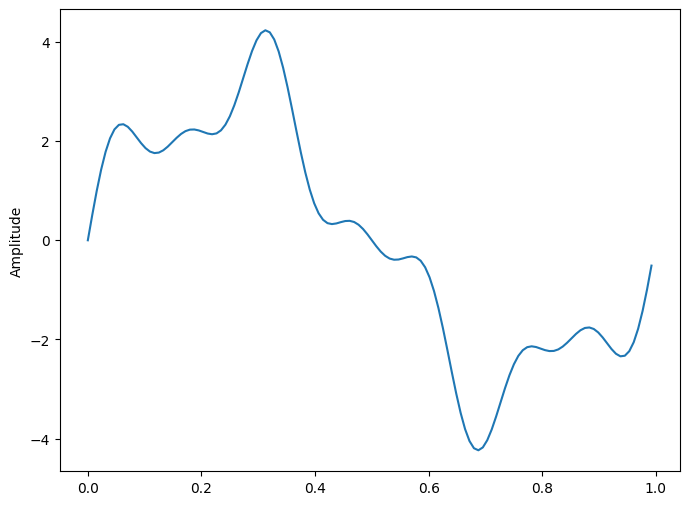

In [14]:
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x)
plt.ylabel('Amplitude')

plt.show()

In [15]:
def fft(x):
    """
    A recursive implementation of the Cooley-Tukey FFT algorithm,
    the input should have a length of the power of 2.
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        half_N = N // 2
        return np.concatenate([
            X_even + factor[:half_N] * X_odd,
            X_even + factor[half_N:] * X_odd
        ])

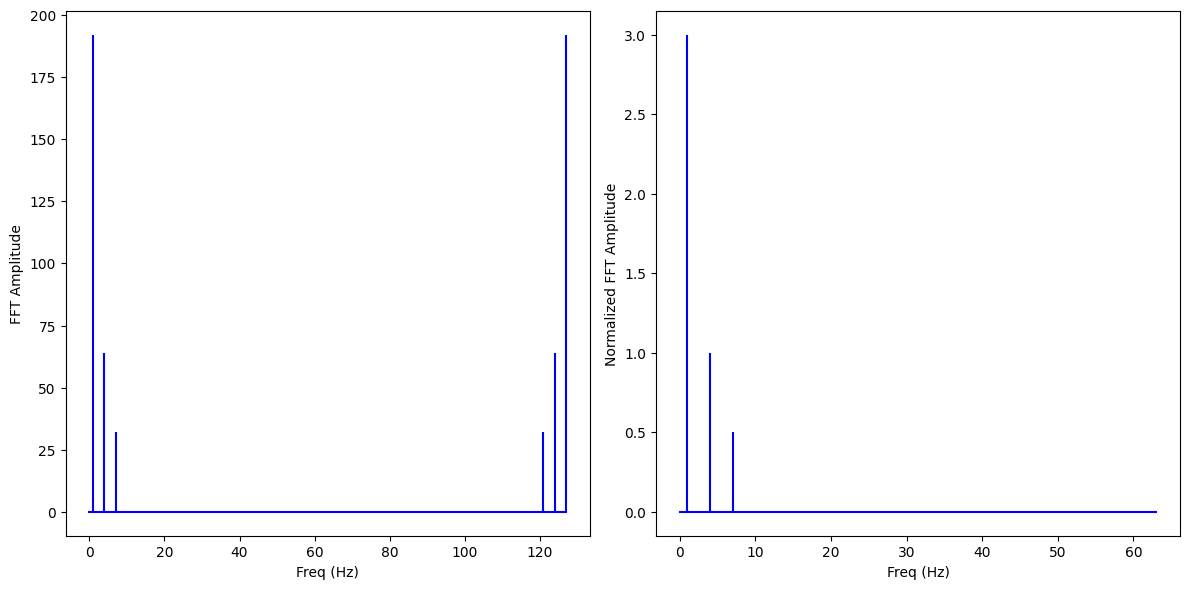

In [16]:
X = fft(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')

n_oneside = N//2
f_oneside = freq[:n_oneside]

X_oneside = X[:n_oneside]/n_oneside

plt.subplot(1, 2, 2)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude')
plt.tight_layout()
plt.show()

In [17]:
def fft2d(matrix):
    """
    Applies 2D FFT by performing 1D FFT on rows and then columns.
    """
    fft_rows = [fft(row) for row in matrix]
    fft_columns = [fft(column) for column in zip(*fft_rows)]
    res = np.array([list(col) for col in zip(*fft_columns)])
    res = np.round(res, decimals=8)
    return res

In [18]:
test_data = [
    [1, 2], # 3, 4, 5, 2, 5, 6],
    [5, 4], #3, 2, 1, 3, 2, 3],
    # [1, 2, 3, 4, 5, 4, 4, 5],
    # [5, 4, 3, 2, 1, 5, 7, 8],
    # [1, 2, 3, 4, 5, 6, 3, 1],
    # [2, 3, 4, 5, 6, 3, 6, 4],
    # [1, 2, 3, 4, 5, 2, 5, 6],
    # [5, 4, 3, 2, 1, 3, 2, 3]
]

fft_res = fft2d(test_data)

In [19]:
numpy_fft_result = np.fft.fft2(test_data)

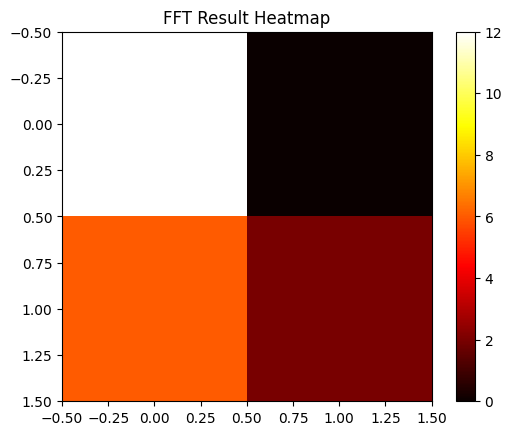

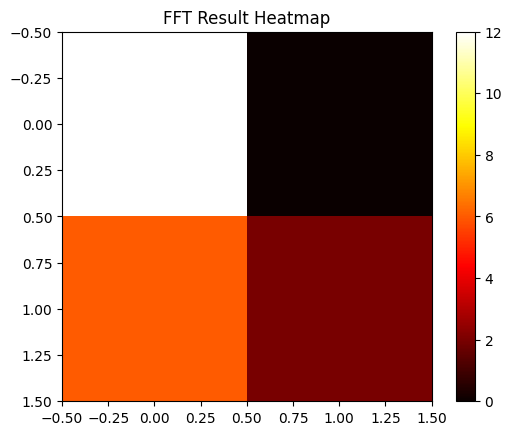

True


In [20]:
plt.imshow(np.abs(fft_res), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('FFT Result Heatmap')
plt.show()

plt.imshow(np.abs(numpy_fft_result), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('FFT Result Heatmap')
plt.show()

print(np.allclose(fft_res, numpy_fft_result)) # True

In [21]:
class Conv2d:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        """
        Initializes a Conv2D layer.

        Parameters:
        - in_channels: Number of input channels.
        - out_channels: Number of output channels.
        - kernel_size: Size of the convolutional kernel (integer or tuple of 2 integers).
        - stride: Stride of the convolution (integer or tuple of 2 integers).
        - padding: Padding applied to the input matrix (integer or tuple of 2 integers).
        """
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        self.stride = (stride, stride) if isinstance(stride, int) else stride
        self.padding = (padding, padding) if isinstance(padding, int) else padding
        
        # Initialize kernels and biases
        self.kernels = np.random.randn(out_channels, in_channels, *self.kernel_size)
        self.biases = np.random.randn(out_channels)
    
    def forward(self, input_matrix):
        """
        Applies the convolution operation on the input matrix.

        Parameters:
        - input_matrix: Input matrix of shape (in_channels, height, width).

        Returns:
        - Output matrix after convolution.
        """
        if len(input_matrix.shape) != 3 or input_matrix.shape[0] != self.in_channels:
            raise ValueError("Input matrix must have shape (in_channels, height, width).")
        
        in_channels, height, width = input_matrix.shape
        kernel_height, kernel_width = self.kernel_size
        stride_y, stride_x = self.stride
        pad_y, pad_x = self.padding
        
        # Pad the input matrix
        padded_height = height + 2 * pad_y
        padded_width = width + 2 * pad_x
        padded_input = np.zeros((in_channels, padded_height, padded_width))
        padded_input[:, pad_y:pad_y + height, pad_x:pad_x + width] = input_matrix
        
        # Compute output dimensions
        out_height = (padded_height - kernel_height) // stride_y + 1
        out_width = (padded_width - kernel_width) // stride_x + 1
        output = np.zeros((self.out_channels, out_height, out_width))
        
        # Perform convolution
        for out_c in range(self.out_channels):
            for in_c in range(self.in_channels):
                for i in range(out_height):
                    for j in range(out_width):
                        start_y = i * stride_y
                        start_x = j * stride_x
                        end_y = start_y + kernel_height
                        end_x = start_x + kernel_width
                        
                        region = padded_input[in_c, start_y:end_y, start_x:end_x]
                        output[out_c, i, j] += np.sum(region * self.kernels[out_c, in_c])
            output[out_c] += self.biases[out_c]
        
        return output

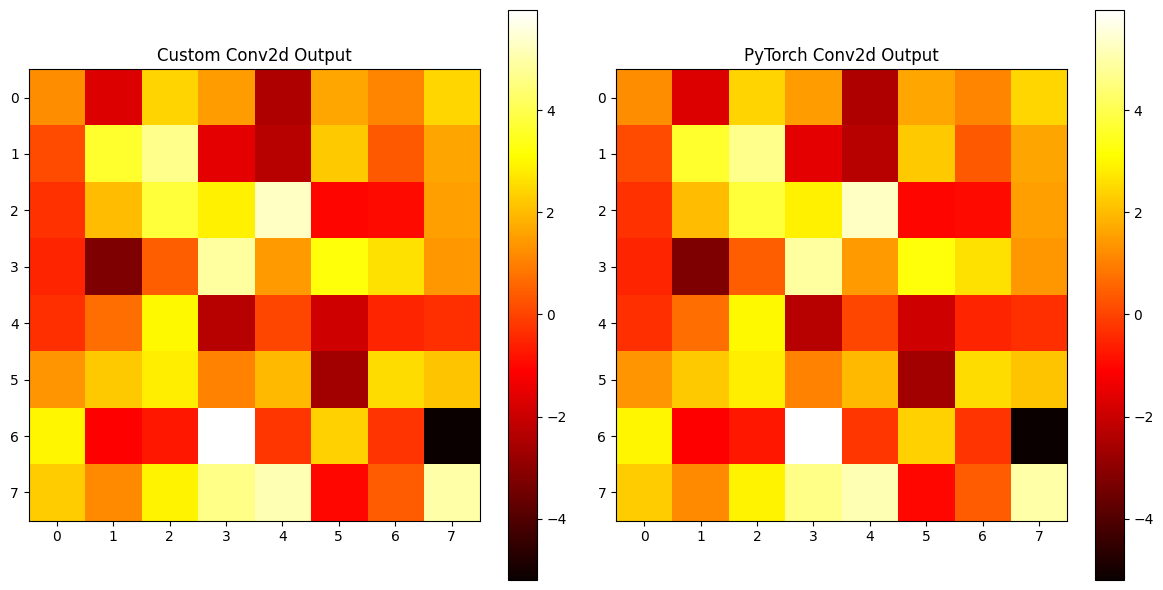

Difference between custom and PyTorch outputs:
4.59145368836289e-07
Difference is negligible.


In [28]:
import torch 

input_matrix = np.random.randn(1, 8, 8).astype(np.float32)

conv2d = Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
custom_output = conv2d.forward(input_matrix)

torch_input = torch.tensor(input_matrix).unsqueeze(0)  # Add batch dimension (1, 1, 8, 8)
torch_conv2d = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1, bias=True)

# Match PyTorch weights and bias with the custom Conv2d layer
torch_conv2d.weight.data = torch.tensor(conv2d.kernels, dtype=torch.float32)
torch_conv2d.bias.data = torch.tensor(conv2d.biases, dtype=torch.float32)

# Perform convolution with PyTorch
torch_output = torch_conv2d(torch_input).squeeze(0).detach().numpy()  # Remove batch dimension and convert to numpy

# Plotting the results side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Custom Conv2d output
axes[0].imshow(custom_output[0], cmap='hot', interpolation='nearest')
axes[0].set_title("Custom Conv2d Output")
axes[0].colorbar = plt.colorbar(axes[0].imshow(custom_output[0], cmap='hot', interpolation='nearest'), ax=axes[0])

# PyTorch Conv2d output
axes[1].imshow(torch_output[0], cmap='hot', interpolation='nearest')
axes[1].set_title("PyTorch Conv2d Output")
axes[1].colorbar = plt.colorbar(axes[1].imshow(torch_output[0], cmap='hot', interpolation='nearest'), ax=axes[1])

plt.tight_layout()
plt.show()

# Comparison
print("Difference between custom and PyTorch outputs:")
print(np.abs(custom_output - torch_output).max())
print("Difference is negligible." if np.abs(custom_output - torch_output).max() < 1e-6 else "Difference is significant.")

In [ ]:
# def next_power_of_two(x):
#     return 1 if x == 0 else 2**((x - 1).bit_length())

# def pad_to_same_size(input_matrix, kernel):
#     """
#     Pads the input and kernel to the same size, which is the next power of 2
#     greater than or equal to the maximum dimension of the input and kernel.
#     """
#     rows = max(len(input_matrix), len(kernel))
#     cols = max(len(input_matrix[0]), len(kernel[0]))
    
#     padded_size = (next_power_of_two(rows), next_power_of_two(cols))
    
#     padded_input = np.zeros(padded_size, dtype=complex)
#     padded_kernel = np.zeros(padded_size, dtype=complex)

#     for i in range(len(input_matrix)):
#         for j in range(len(input_matrix[0])):
#             padded_input[i][j] = input_matrix[i][j]
    
#     for i in range(len(kernel)):
#         for j in range(len(kernel[0])):
#             padded_kernel[i][j] = kernel[i][j]
    
#     return padded_input, padded_kernel

# def convolve_fft2d(input_matrix, kernel):
#     # Flip the kernel for convolution
#     kernel = np.flip(np.flip(kernel, axis=0), axis=1)

#     # Pad input and kernel to the same size
#     padded_input, padded_kernel = pad_to_same_size(input_matrix, kernel)

#     # Perform FFT
#     input_fft = fft2d(padded_input)
#     kernel_fft = fft2d(padded_kernel)

#     # Element-wise multiplication in frequency domain
#     result_fft = [[input_fft[i][j] * kernel_fft[i][j] for j in range(len(input_fft[0]))] for i in range(len(input_fft))]

#     # Perform inverse FFT
#     result = fft2d(result_fft)

#     # Extract the valid convolution result (same size as the original input matrix)
#     valid_height = len(input_matrix)
#     valid_width = len(input_matrix[0])
#     result = np.array(result)
#     result = result[:valid_height, :valid_width]

#     return [[val.real for val in row] for row in result]

In [ ]:
# class CustomFFTConv2D:
#     def __init__(self, in_channels, out_channels, kernel_size, custom_kernel=None):
#         self.in_channels = in_channels
#         self.out_channels = out_channels
#         self.kernel_size = kernel_size

#         if custom_kernel:
#             self.kernels = [custom_kernel]
#         else:
#             self.kernels = [[[0.1 for _ in range(kernel_size)] for _ in range(kernel_size)] for _ in range(out_channels)]

#     def forward(self, input_matrix):
#         outputs = []
#         for kernel in self.kernels:
#             outputs.append(convolve_fft2d(input_matrix, kernel))

#         # Aggregate the results for all kernels
#         return [[sum(pixels) for pixels in zip(*row)] for row in zip(*outputs)]

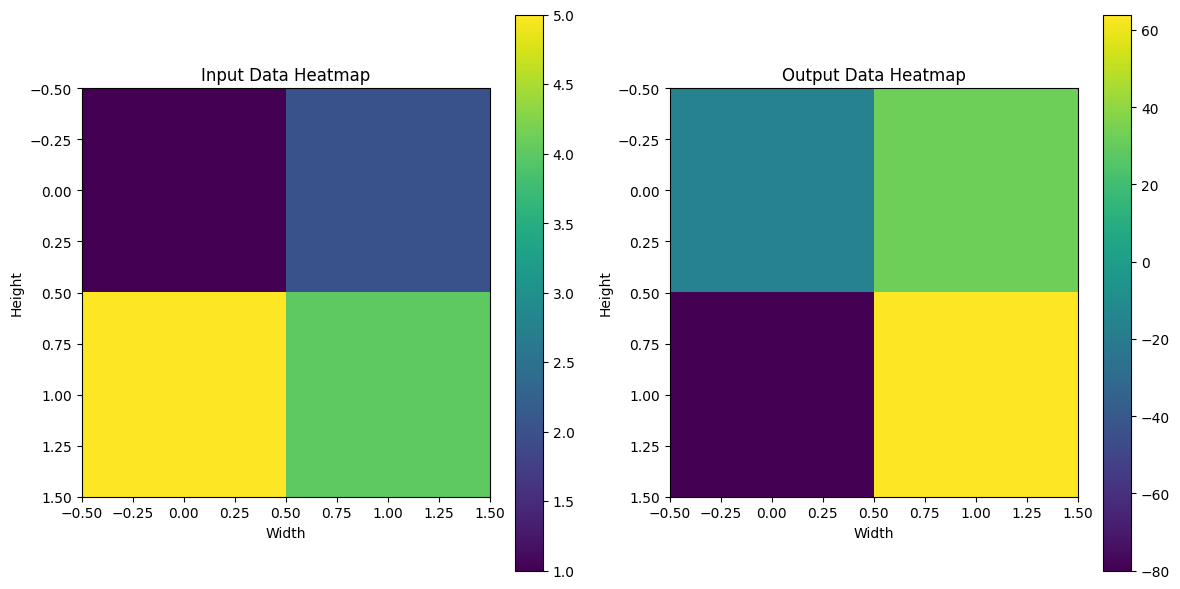

In [ ]:
# input_data = test_data

# test_kernel = [
#     [1, 0, -1],
#     [1, 0, -1],
#     [1, 0, -1]
# ]

# conv2d = CustomFFTConv2D(1, 1, 3, custom_kernel=test_kernel)
# output_data = conv2d.forward(input_data)

# input_array = np.array(input_data)
# output_array = np.array(output_data)

# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# axs[0].imshow(input_array, interpolation='nearest')
# axs[0].set_title('Input Data Heatmap')
# axs[0].set_xlabel('Width')
# axs[0].set_ylabel('Height')
# axs[0].figure.colorbar(axs[0].imshow(input_array, interpolation='nearest'), ax=axs[0])

# axs[1].imshow(output_array, interpolation='nearest')
# axs[1].set_title('Output Data Heatmap')
# axs[1].set_xlabel('Width')
# axs[1].set_ylabel('Height')
# axs[1].figure.colorbar(axs[1].imshow(output_array, interpolation='nearest'), ax=axs[1])

# plt.tight_layout()
# plt.show()

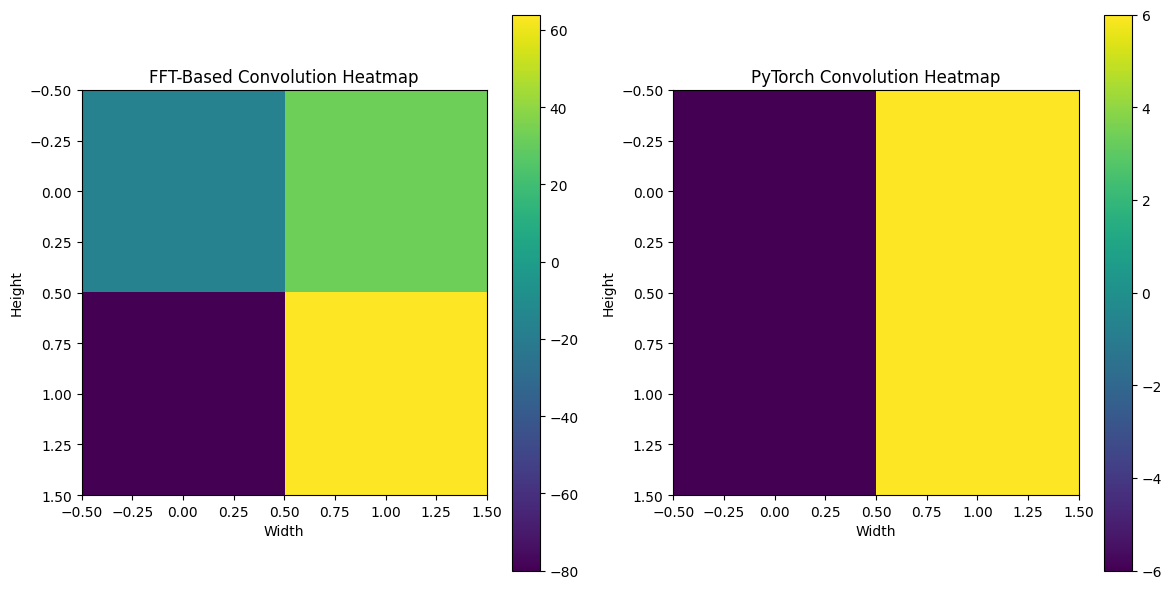

Outputs are not within tolerance


In [ ]:
# import torch
# import torch.nn as nn

# input_tensor = torch.tensor(input_data, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  
# kernel_tensor = torch.tensor(test_kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
# conv2d = nn.Conv2d(1, 1, kernel_size=3, bias=False, padding=1)  
# conv2d.weight.data = kernel_tensor
# torch_output = conv2d(input_tensor).squeeze(0).squeeze(0).detach().numpy()

# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# axs[0].imshow(output_array, interpolation='nearest')
# axs[0].set_title('FFT-Based Convolution Heatmap')
# axs[0].set_xlabel('Width')
# axs[0].set_ylabel('Height')
# axs[0].figure.colorbar(axs[0].imshow(output_array, interpolation='nearest'), ax=axs[0])

# axs[1].imshow(torch_output, interpolation='nearest')
# axs[1].set_title('PyTorch Convolution Heatmap')
# axs[1].set_xlabel('Width')
# axs[1].set_ylabel('Height')
# axs[1].figure.colorbar(axs[1].imshow(torch_output, interpolation='nearest'), ax=axs[1])

# plt.tight_layout()
# plt.show()

# tolerance = 1e-5
# difference = np.abs(output_array - torch_output)
# if np.all(difference < tolerance):
#     print("Outputs are within tolerance")
# else:
#     print("Outputs are not within tolerance")